## 1. Carga de librerías necesarias para implementación

In [342]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from sklearn.decomposition import PCA

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
print(os.getcwd()) # dice donde cree que es el repositorio donde esta trabajando para hacer el path relativo funcional

c:\Users\User\Lab1


## 2. Cargar los datos

In [343]:
df_movies = pd.read_csv('data/MovieAlpes_data.csv', sep=';', encoding='utf-8')
df_algoritmo2=pd.read_csv('data/MovieAlpes_data.csv', sep=';', encoding='utf-8')

## 3. Entendimiento de los datos 

### 3.1. Perfilamiento de datos

In [344]:
df_movies.shape

(7471, 18)

In [345]:
df_movies.head()

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre
0,1,1,tt0103064,movie,Terminator 2: Judgment Day,0.0,1991.0,137,8.6,1128166.0,17.0,US,en,dvd,\N,0.0,Action,Sci-Fi
1,10,17,tt0231050,tvSeries,ToransufÃ´mÃ¢: KÃ¢robotto,0.0,2000.0,22,6.6,577.0,16.0,US,en,alternative,\N,0.0,Action,Adventure
2,13,23,tt0253474,movie,The Pianist,0.0,2002.0,150,8.5,860569.0,7.0,US,en,imdbDisplay,\N,0.0,Biography,Drama
3,21,55,tt0369339,movie,Collateral,0.0,2004.0,120,7.5,417391.0,6.0,US,en,imdbDisplay,\N,0.0,Action,Crime
4,28,87,tt0439547,movie,2 Filhos de Francisco: A HistÃ³ria de ZezÃ© di...,0.0,2005.0,132,6.9,5946.0,5.0,US,en,imdbDisplay,\N,0.0,Biography,Drama


In [346]:
# Revisar las características de los datos: completitud y tipo de dat
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                7471 non-null   int64  
 1   index            7471 non-null   int64  
 2   tconst           7471 non-null   object 
 3   titleType        7471 non-null   object 
 4   originalTitle    7471 non-null   object 
 5   isAdult          7470 non-null   float64
 6   startYear        7470 non-null   float64
 7   runtimeMinutes   7470 non-null   object 
 8   averageRating    7470 non-null   float64
 9   numVotes         7470 non-null   float64
 10  ordering         7470 non-null   float64
 11  region           7470 non-null   object 
 12  language         7470 non-null   object 
 13  types            7470 non-null   object 
 14  attributes       7470 non-null   object 
 15  isOriginalTitle  7470 non-null   float64
 16  main_genre       7470 non-null   object 
 17  secondary_genr

In [347]:
# Resumen de los estadisticos de las variables numéricas
df_movies.describe()

,#,index,isAdult,startYear,averageRating,numVotes,ordering,isOriginalTitle
count,7471.000000,7471.000000,7470.0,7470.000000,7470.000000,7.470000e+03,7470.000000,7470.0
mean,4043.482666,5440.458439,0.0,2013.157296,7.475676,7.282830e+04,16.567604,0.0
std,2192.753689,2752.820924,0.0,6.979151,2.771444,1.640233e+05,12.761147,0.0
min,1.000000,1.000000,0.0,1990.000000,6.500000,1.000000e+01,1.000000,0.0
25%,2152.500000,3073.500000,0.0,2008.000000,6.900000,6.265250e+03,6.000000,0.0
50%,4033.000000,5421.000000,0.0,2015.000000,7.300000,1.527900e+04,14.000000,0.0
75%,5914.500000,7641.500000,0.0,2019.000000,7.800000,5.641975e+04,24.000000,0.0
max,7849.000000,10274.000000,0.0,2023.000000,92.000000,2.197234e+06,119.000000,0.0


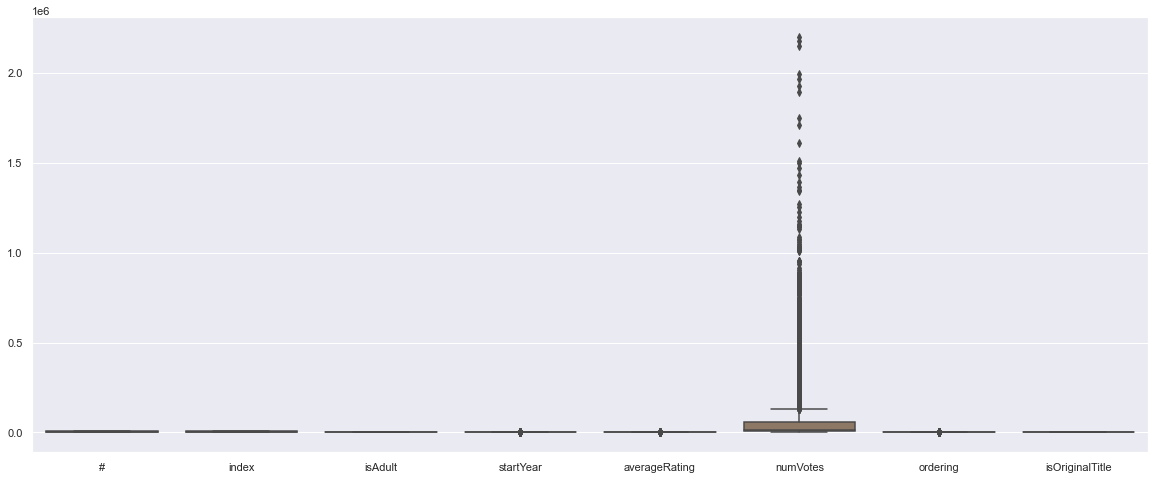

In [348]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies, orient="v")

In [349]:
#Separación de las variables float de las int
name_cols_float = df_movies.select_dtypes(include = ['float']).columns
print("Columnas con tipo de dato 'float':", name_cols_float)

name_cols_int = df_movies.select_dtypes(include = ['int64']).columns
print("Columnas con tipo de dato 'int64':", name_cols_int)


Columnas con tipo de dato 'float': Index(['isAdult', 'startYear', 'averageRating', 'numVotes', 'ordering',
       'isOriginalTitle'],
      dtype='object')
Columnas con tipo de dato 'int64': Index(['#', 'index'], dtype='object')


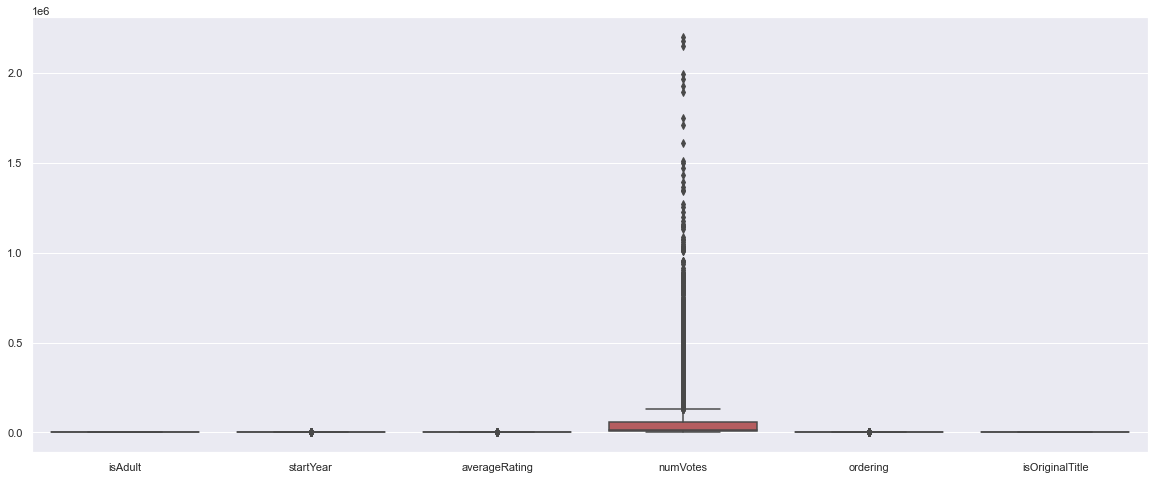

In [350]:
#Visualización de todas las variables numéricas de tipo Float
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies[name_cols_float], orient="v")

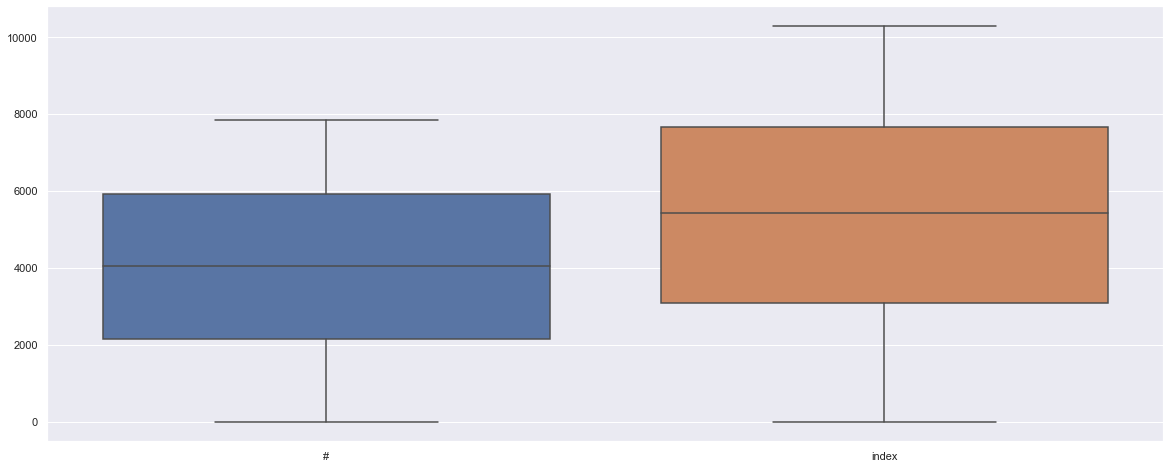

In [351]:
#Visualización de todas las variables numéricas de tipo int
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies[name_cols_int], orient="v")

In [352]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_movies.select_dtypes(include = ['object']).columns
print("Columnas con tipo de dato 'object' (generalmente textuales):", name_cols_non_number)

Columnas con tipo de dato 'object' (generalmente textuales): Index(['tconst', 'titleType', 'originalTitle', 'runtimeMinutes', 'region',
       'language', 'types', 'attributes', 'main_genre', 'secondary_genre'],
      dtype='object')


In [353]:
#Revisar el contenido de las variables que no son numéricas, en este caso son categóricas
df_movies[name_cols_non_number].describe()

,tconst,titleType,originalTitle,runtimeMinutes,region,language,types,attributes,main_genre,secondary_genre
count,7471,7471,7471,7470,7470,7470,7470,7470,7470,7470
unique,7466,7,7290,362,4,1,5,1,22,26
top,tt0386741,movie,Candy,60,IN,en,imdbDisplay,\N,Drama,Drama
freq,2,4673,3,534,5590,7470,7395,7470,1767,2428


Distribución de valores para 'tconst':
tt0386741     2
tt0395843     2
tt12443930    2
tt1535109     2
tt0390538     2
Name: tconst, dtype: int64


Distribución de valores para 'titleType':
movie           4673
tvSeries        2340
tvMiniSeries     379
tvMovie           70
MOVIE              5
Name: titleType, dtype: int64


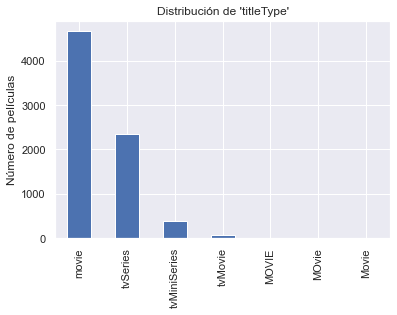



Distribución de valores para 'originalTitle':
Candy        3
Life         3
Monster      3
Limitless    3
Taken        3
Name: originalTitle, dtype: int64


Distribución de valores para 'runtimeMinutes':
60    534
30    340
45    184
22    138
43    114
Name: runtimeMinutes, dtype: int64


Distribución de valores para 'region':
IN    5590
CA    1782
US      94
GB       4
Name: region, dtype: int64


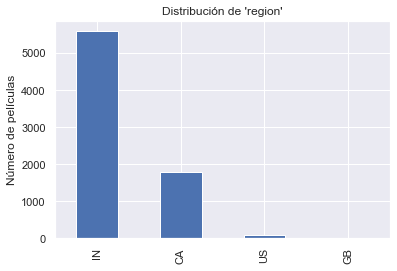



Distribución de valores para 'language':
en    7470
Name: language, dtype: int64


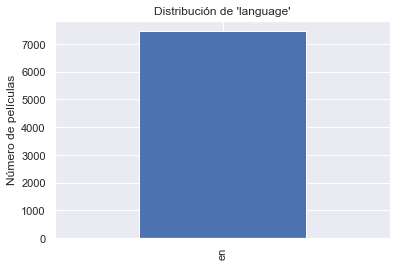



Distribución de valores para 'types':
imdbDisplay    7395
working          38
alternative      24
festival         11
dvd               2
Name: types, dtype: int64


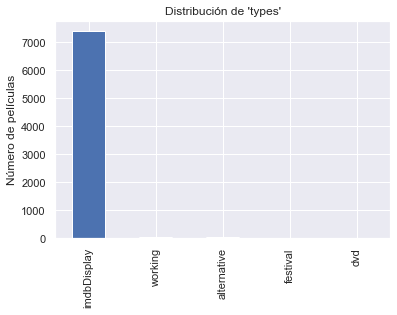



Distribución de valores para 'attributes':
\N    7470
Name: attributes, dtype: int64


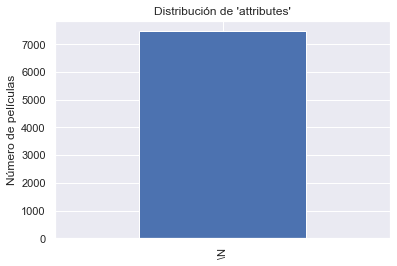



Distribución de valores para 'main_genre':
Drama        1767
Comedy       1615
Action       1571
Crime         867
Biography     597
Name: main_genre, dtype: int64


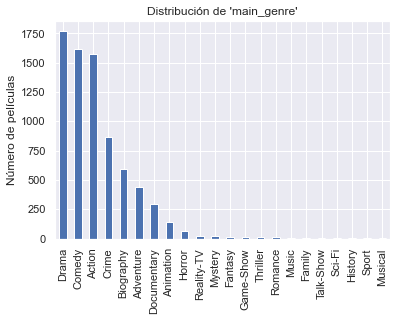



Distribución de valores para 'secondary_genre':
Drama        2428
No tiene     1052
Crime         634
Adventure     574
Romance       453
Name: secondary_genre, dtype: int64


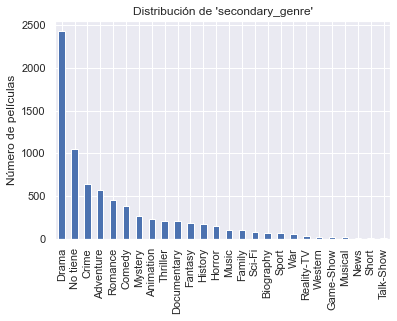

In [354]:
# Lista de columnas a analizar
cols_to_analyze = ['tconst', 'titleType', 'originalTitle', 'runtimeMinutes', 'region', 'language', 'types', 'attributes', 'main_genre', 'secondary_genre']

for col in cols_to_analyze:
    print(f"Distribución de valores para '{col}':")
    value_counts = df_movies[col].value_counts()
    print(value_counts.head())  # Mostrar los 5 valores más comunes
    
    # Graficar si la columna tiene menos de 30 valores únicos para mejor visualización
    if len(value_counts) < 30:
        value_counts.plot(kind='bar')
        plt.title(f"Distribución de '{col}'")
        plt.ylabel('Número de películas')
        plt.show()
    
    print("\n")  # Separación entre análisis


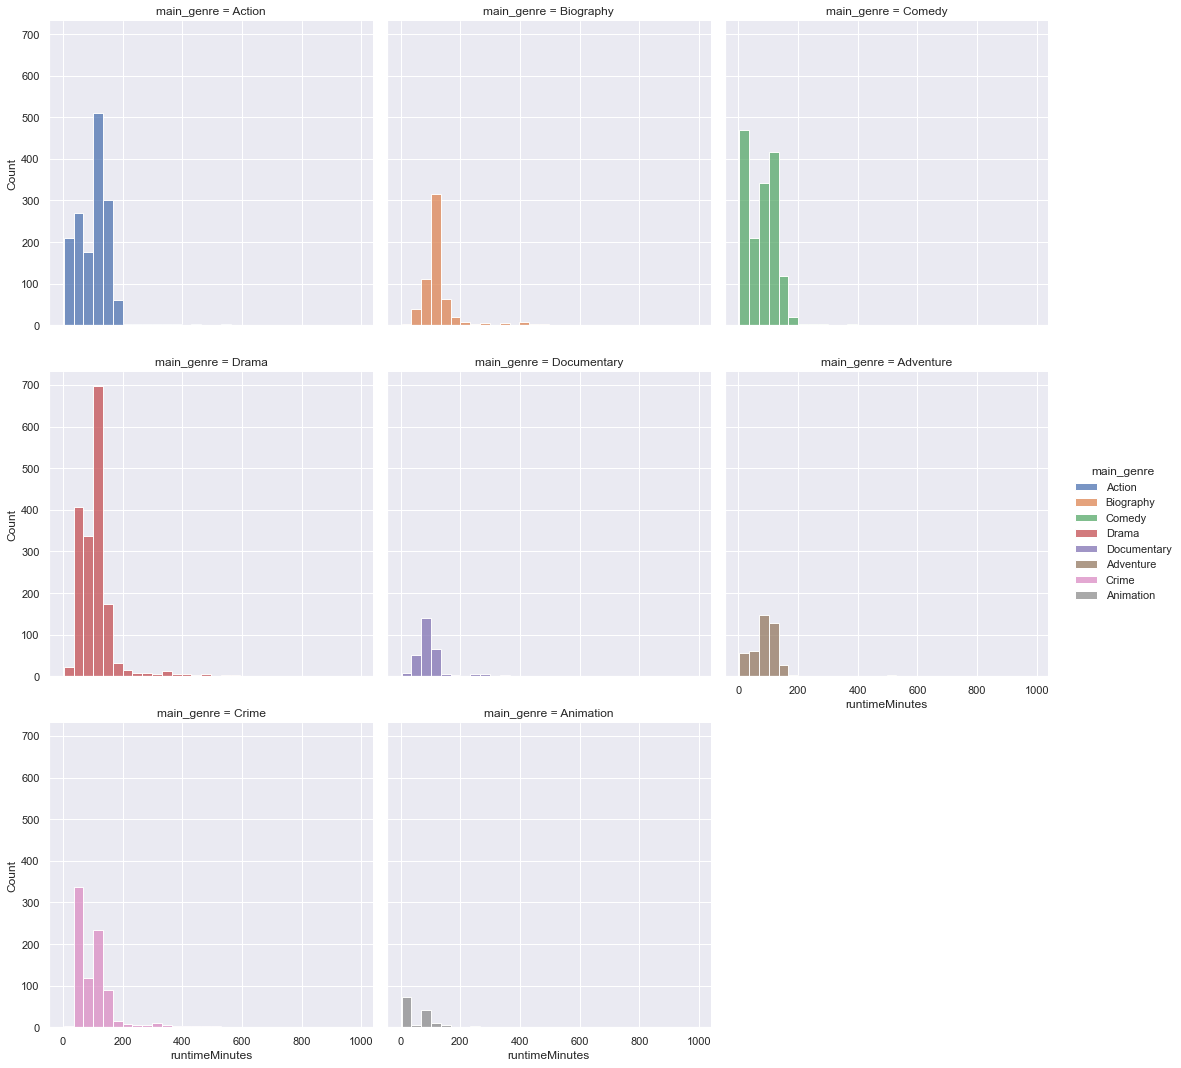

In [355]:
# Reemplaza '\\N' por NaN
df_movies['runtimeMinutes'].replace('\\N', np.nan, inplace=True)

# Convierte a float
df_movies['runtimeMinutes'] = df_movies['runtimeMinutes'].astype(float)

# Contamos cuántas películas hay por cada género
genre_counts = df_movies['main_genre'].value_counts()

# Filtramos los géneros que tienen, por ejemplo, más de 100 películas
selected_genres = genre_counts[genre_counts > 100].index

# Filtra el DataFrame para incluir solo los géneros seleccionados
filtered_movies = df_movies[df_movies['main_genre'].isin(selected_genres)]

# Grafica las distribuciones para estos géneros
sns.displot(data=filtered_movies, x="runtimeMinutes", hue="main_genre", col="main_genre", col_wrap=3, bins=30)
plt.show()


In [356]:
# Selecciona las columnas de tipo 'object'
name_cols_object = df_movies.select_dtypes(include=['object']).columns

# Consulta una muestra de 15 registros de esas columnas
df_movies[name_cols_object].sample(15)


,tconst,titleType,originalTitle,region,language,types,attributes,main_genre,secondary_genre
5489,tt9113406,tvSeries,Wu-Tang: An American Saga,IN,en,imdbDisplay,\N,Biography,Drama
1024,tt0469623,movie,Things We Lost in the Fire,IN,en,imdbDisplay,\N,Drama,No tiene
6608,tt1582456,tvSeries,Prime Suspect,CA,en,imdbDisplay,\N,Crime,Drama
667,tt0364647,movie,Virumandi,IN,en,imdbDisplay,\N,Action,Crime
7076,tt3863484,movie,King Jack,CA,en,imdbDisplay,\N,Adventure,Drama
3828,tt3404158,movie,Yong-eui-ja,IN,en,imdbDisplay,\N,Action,Thriller
4686,tt6172460,tvMovie,Rocko's Modern Life: Static Cling,IN,en,imdbDisplay,\N,Action,Adventure
6498,tt1315981,movie,A Single Man,CA,en,imdbDisplay,\N,Crime,Drama
1396,tt10243678,movie,Chopsticks,IN,en,imdbDisplay,\N,Comedy,Drama
3282,tt21908550,tvSeries,Vadhandhi: The Fable of Velonie,IN,en,imdbDisplay,\N,Crime,Drama


### 3.2. Análisis de calidad de datos


### 3.2.1 Completitud - Análisis de valores nulos o vacíos


In [357]:
# Cálculo de porcentaje de valores nulos por columna en df_movies
((df_movies.isnull().sum() / df_movies.shape[0]) * 100).sort_values(ascending=False)


runtimeMinutes     1.325124
secondary_genre    0.013385
ordering           0.013385
isAdult            0.013385
startYear          0.013385
main_genre         0.013385
numVotes           0.013385
averageRating      0.013385
region             0.013385
language           0.013385
types              0.013385
attributes         0.013385
isOriginalTitle    0.013385
originalTitle      0.000000
titleType          0.000000
tconst             0.000000
index              0.000000
#                  0.000000
dtype: float64

En el DataFrame df_movies, la columna runtimeMinutes presenta un 1.325124% de valores nulos, lo que sugiere que hay algunas películas o series sin información sobre su duración. Por otro lado, las columnas numVotes, ordering, main_genre, isOriginalTitle, attributes, types, language, region, secondary_genre, averageRating, startYear y isAdult muestran un 0.013385% de valores nulos, indicando que raramente se carece de esta información en estas columnas. Las columnas index, originalTitle, titleType, tconst y # están completamente llenas sin ningún valor faltante. Con esto podemos concluir que en cuanto a completitud los datos tienen una muy buena calidad.

### 3.2.2 Unicidad

In [358]:
duplicated_movies = df_movies.duplicated(keep=False).sum()
print(f"El número de registros duplicados en df_movies es: {duplicated_movies}")

El número de registros duplicados en df_movies es: 6


A comparacion con el tamano total de los datos se puede ver que tienen muy pocos registros duplicados por lo que, aunque es importante eliminarlos para mejorar la calidad de los analisis, se podrian calificar los datos como muy buenos en cuanto a unicidad.

### 3.2.3 Consistencia


In [359]:
# Columna: tconst
print("Valores para la columna 'tconst':")
print(df_movies['tconst'].value_counts().head(10))
print("-" * 50)


Valores para la columna 'tconst':
tt0386741     2
tt0395843     2
tt12443930    2
tt1535109     2
tt0390538     2
tt14479480    1
tt5962210     1
tt0835434     1
tt2432604     1
tt17513352    1
Name: tconst, dtype: int64
--------------------------------------------------


In [360]:
# Columna: titleType
print("Valores para la columna 'titleType':")
print(df_movies['titleType'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'titleType':
movie           4673
tvSeries        2340
tvMiniSeries     379
tvMovie           70
MOVIE              5
MOvie              3
Movie              1
Name: titleType, dtype: int64
--------------------------------------------------


In [361]:
# Columna: originalTitle
print("Valores para la columna 'originalTitle':")
print(df_movies['originalTitle'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'originalTitle':
Candy                   3
Life                    3
Monster                 3
Limitless               3
Taken                   3
Beauty and the Beast    3
Home                    3
Wanted                  3
In the Dark             2
The Missing             2
Name: originalTitle, dtype: int64
--------------------------------------------------


In [362]:
# Columna: runtimeMinutes
print("Valores para la columna 'runtimeMinutes':")
print(df_movies['runtimeMinutes'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'runtimeMinutes':
60.0     534
30.0     340
45.0     184
22.0     138
43.0     114
90.0     112
105.0    110
42.0     108
100.0    100
106.0     99
Name: runtimeMinutes, dtype: int64
--------------------------------------------------


In [363]:
# Columna: region
print("Valores para la columna 'region':")
print(df_movies['region'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'region':
IN    5590
CA    1782
US      94
GB       4
Name: region, dtype: int64
--------------------------------------------------


In [364]:
# Columna: language
print("Valores para la columna 'language':")
print(df_movies['language'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'language':
en    7470
Name: language, dtype: int64
--------------------------------------------------


In [365]:
# Columna: types
print("Valores para la columna 'types':")
print(df_movies['types'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'types':
imdbDisplay    7395
working          38
alternative      24
festival         11
dvd               2
Name: types, dtype: int64
--------------------------------------------------


In [366]:
# Columna: attributes
print("Valores para la columna 'attributes':")
print(df_movies['attributes'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'attributes':
\N    7470
Name: attributes, dtype: int64
--------------------------------------------------


In [367]:
# Columna: main_genre
print("Valores para la columna 'main_genre':")
print(df_movies['main_genre'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'main_genre':
Drama          1767
Comedy         1615
Action         1571
Crime           867
Biography       597
Adventure       440
Documentary     297
Animation       144
Horror           63
Reality-TV       24
Name: main_genre, dtype: int64
--------------------------------------------------


In [368]:
# Columna: secondary_genre
print("Valores para la columna 'secondary_genre':")
print(df_movies['secondary_genre'].value_counts().head(10))
print("-" * 50)

Valores para la columna 'secondary_genre':
Drama          2428
No tiene       1052
Crime           634
Adventure       574
Romance         453
Comedy          383
Mystery         259
Animation       224
Thriller        209
Documentary     200
Name: secondary_genre, dtype: int64
--------------------------------------------------


La columna tconst parece tener muy pocas repeticiones por lo que probablemente sea alguna referencia especial. Ahora bien, referiendonos a los datos podemos ver que la columna titleType sufre de problemas de consistencia con el nombramiento de movie. El resto de columnas parecen tener buena consistencia, sin embargo arreglar la columna de titleType mejorara los resultados de analisis al evitar problemas.

### 3.2.4 Validez


Se verifica el valor de cada uno de los atributos del dataset.

In [369]:
df_movies.describe()

,#,index,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,isOriginalTitle
count,7471.000000,7471.000000,7470.0,7470.000000,7372.000000,7470.000000,7.470000e+03,7470.000000,7470.0
mean,4043.482666,5440.458439,0.0,2013.157296,100.777130,7.475676,7.282830e+04,16.567604,0.0
std,2192.753689,2752.820924,0.0,6.979151,65.016795,2.771444,1.640233e+05,12.761147,0.0
min,1.000000,1.000000,0.0,1990.000000,3.000000,6.500000,1.000000e+01,1.000000,0.0
25%,2152.500000,3073.500000,0.0,2008.000000,60.000000,6.900000,6.265250e+03,6.000000,0.0
50%,4033.000000,5421.000000,0.0,2015.000000,101.000000,7.300000,1.527900e+04,14.000000,0.0
75%,5914.500000,7641.500000,0.0,2019.000000,122.000000,7.800000,5.641975e+04,24.000000,0.0
max,7849.000000,10274.000000,0.0,2023.000000,990.000000,92.000000,2.197234e+06,119.000000,0.0


In [370]:
df_movies['isAdult'].unique

<bound method Series.unique of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7466    0.0
7467    0.0
7468    0.0
7469    0.0
7470    0.0
Name: isAdult, Length: 7471, dtype: float64>

Se evidencia que la columna isAdult() no posee valores unicos, y todos los registros tienen un valor de 0.0

In [371]:
df_movies['isAdult']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7466    0.0
7467    0.0
7468    0.0
7469    0.0
7470    0.0
Name: isAdult, Length: 7471, dtype: float64

Verificar que los valores de averageRating se encuentren en el debido rango: [0,10], y contar los valores que no se encuentren en el rango

In [372]:
conteo_averageRating = (~((df_movies['averageRating'] >= 0) & (df_movies['averageRating'] <= 10))).sum()
conteo_averageRating



14

Estudiar valores de atributes.

In [373]:
df_movies['attributes'].unique()

array(['\\N', nan], dtype=object)

Verificar que el language los datos, sea ingles para todos los casos

In [374]:
df_movies['language']

0       en
1       en
2       en
3       en
4       en
        ..
7466    en
7467    en
7468    en
7469    en
7470    en
Name: language, Length: 7471, dtype: object

Verificar que la region se encuentre en las mencionadas

In [375]:
regionesInvalidas = (~df_movies['region'].isin(['IN', 'US', 'CA', 'GB'])).sum()
regionesInvalidas

1

Contar las filas que no cumplen con el formato enunciado (Movie, tvSeries,tvMiniSeries,tvMovie )

In [376]:
#Convertir los valores a minusculas
df_movies['titleType'] = df_movies['titleType'].str.lower()

invalidoTitleType = df_movies[~df_movies['titleType'].isin(['movie', 'tvseries', 'tvminiseries', 'tvmovie'])]
invalidoTitleType
#Todos cumplen con ello

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre


## 4. Iteración 1. Primer modelo

### 4.1 Preparar los datos
A nivel de preparación de datos debemos fijarnos en:
- A. Correcciones relacionadas con problemas de calidad de dato: nulos, duplicados, inconsistencia, diferencia de formatos, etc.
- B. Preparación relacionada con la tarea de aprendizaje
    - Selección de columnas a incluir de acuerdo con la tarea de aprendizaje a realizar y el conocimiento del contexto del negocio
    - ...
- C. Preparación de acuerdo con el algoritmo a utilizar, en este caso K-means
    Al revisar k-means vemos que el algoritmo trabaja únicamente con datos numéricos, y no nulos así que si vamos a incluir datos categóricos debemos transformarlos a numéricos y si tenemos datos nulos debemos transformalos y en el peor escenario retirarlos del modelo ya sea la fila que los incluye o toda la columna si el porcentaje de estos valores es alto.

## 5. Iteración 1. Segundo Modelo (DBScan)

### 5.1 Preparar los datos
A nivel de preparación de datos debemos fijarnos en:
- A. Correcciones relacionadas con problemas de calidad de dato: nulos, duplicados, inconsistencia, diferencia de formatos, etc.
- B. Preparación relacionada con la tarea de aprendizaje
    - Selección de columnas a incluir de acuerdo con la tarea de aprendizaje a realizar y el conocimiento del contexto del negocio
    - ...
- C. Preparación de acuerdo con el algoritmo a utilizar, en este caso K-means
    Al revisar k-means vemos que el algoritmo trabaja únicamente con datos numéricos, y no nulos así que si vamos a incluir datos categóricos debemos transformarlos a numéricos y si tenemos datos nulos debemos transformalos y en el peor escenario retirarlos del modelo ya sea la fila que los incluye o toda la columna si el porcentaje de estos valores es alto.

Se eliminan las filas, las cuales se evidencia que poseen un alto nivel de apariciones por alguna variable tales como atributes o isAdult, o language o indices

In [452]:
columnasEliminar = ['#', 'index', 'originalTitle', 'isAdult', 'language', 'attributes', 'isOriginalTitle','tconst']
df_movies2 = df_movies.drop(columns=columnasEliminar)

# Mostrar el nuevo DataFrame df_movies2
print(df_movies2)



     titleType  startYear  runtimeMinutes  averageRating   numVotes  ordering  \
0        movie     1991.0           137.0            8.6  1128166.0      17.0   
1     tvseries     2000.0            22.0            6.6      577.0      16.0   
2        movie     2002.0           150.0            8.5   860569.0       7.0   
3        movie     2004.0           120.0            7.5   417391.0       6.0   
4        movie     2005.0           132.0            6.9     5946.0       5.0   
...        ...        ...             ...            ...        ...       ...   
7466     movie     2019.0           108.0            7.3     3779.0      11.0   
7467  tvseries     2019.0            25.0            7.5     3318.0       4.0   
7468     movie     2019.0            99.0            7.2     3346.0      29.0   
7469     movie     2019.0            84.0            6.9     3646.0       6.0   
7470  tvseries     2019.0            23.0            7.2     3577.0      27.0   

     region        types  m

In [453]:
df_movies2

,titleType,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,types,main_genre,secondary_genre
0,movie,1991.0,137.0,8.6,1128166.0,17.0,US,dvd,Action,Sci-Fi
1,tvseries,2000.0,22.0,6.6,577.0,16.0,US,alternative,Action,Adventure
2,movie,2002.0,150.0,8.5,860569.0,7.0,US,imdbDisplay,Biography,Drama
3,movie,2004.0,120.0,7.5,417391.0,6.0,US,imdbDisplay,Action,Crime
4,movie,2005.0,132.0,6.9,5946.0,5.0,US,imdbDisplay,Biography,Drama
...,...,...,...,...,...,...,...,...,...,...
7466,movie,2019.0,108.0,7.3,3779.0,11.0,CA,imdbDisplay,Drama,Romance
7467,tvseries,2019.0,25.0,7.5,3318.0,4.0,CA,imdbDisplay,Animation,Comedy
7468,movie,2019.0,99.0,7.2,3346.0,29.0,CA,imdbDisplay,Drama,Romance
7469,movie,2019.0,84.0,6.9,3646.0,6.0,CA,imdbDisplay,Drama,No tiene


Convertir columna titleType a minuscula

In [454]:
df_movies2['titleType'] = df_movies2['titleType'].str.lower()


Convertir a minusculas las columnas main y secondaryGenre y types

In [455]:
df_movies2['main_genre'] = df_movies2['main_genre'].str.lower()
df_movies2['types'] = df_movies2['types'].str.lower()



Eliminar valores nulos

In [456]:
df_movies2.dropna(inplace=True)


Cumplir con la metrica propuesta de averageRating, valor entre 0 y 10

In [457]:
df_movies2 = df_movies2.drop(df_movies2[(df_movies2['averageRating'] < 0) | (df_movies2['averageRating'] > 10)].index)


Conversion de variables categoricas a numericas por medio de labelEnconding

In [458]:
df_movies2.dtypes

titleType           object
startYear          float64
runtimeMinutes     float64
averageRating      float64
numVotes           float64
ordering           float64
region              object
types               object
main_genre          object
secondary_genre     object
dtype: object

Convertir variables categoricas a numericas, gracias a fit_transform

In [463]:
le = LabelEncoder()
cols_to_encode = ['titleType', 'region', 'types', 'main_genre','secondary_genre']

# Aplicar la codificación para cada columna
for col in cols_to_encode:
    df_movies2[col] = le.fit_transform(df_movies2[col].astype(str))

# Verificar los cambios
print(df_movies2.dtypes)

titleType            int32
startYear          float64
runtimeMinutes     float64
averageRating      float64
numVotes           float64
ordering           float64
region               int32
types                int32
main_genre           int32
secondary_genre      int32
dtype: object


Descripcion de modelo con valores numericos

In [464]:
df_movies2.describe()

,titleType,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,types,main_genre,secondary_genre
count,7359.000000,7359.000000,7359.000000,7359.000000,7.359000e+03,7359.000000,7359.000000,7359.000000,7359.000000,7359.000000
mean,0.986819,2013.074331,100.777144,7.362971,7.328132e+04,16.577932,1.529420,2.993749,12.313494,8.762196
std,1.366896,6.960245,65.052391,0.601009,1.631769e+05,12.781237,0.869696,0.189315,7.648092,6.268130
min,0.000000,1990.000000,3.000000,6.500000,1.000000e+01,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2008.000000,60.000000,6.900000,6.356500e+03,6.000000,2.000000,3.000000,1.000000,4.000000
50%,0.000000,2014.000000,101.000000,7.300000,1.546500e+04,14.000000,2.000000,3.000000,16.000000,6.000000
75%,3.000000,2019.000000,122.000000,7.800000,5.734950e+04,24.000000,2.000000,3.000000,18.000000,16.000000
max,3.000000,2023.000000,990.000000,9.500000,2.197234e+06,119.000000,3.000000,4.000000,21.000000,25.000000


Sample de los datos

In [465]:
pruebaDf = df_movies2.sample(n=20)
pruebaDf

,titleType,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,types,main_genre,secondary_genre
4297,3,2016.0,30.0,7.3,4122.0,4.0,2,3,12,3
251,3,1999.0,22.0,8.2,351953.0,39.0,2,3,12,3
1203,3,2007.0,46.0,8.2,88683.0,18.0,2,3,19,16
2593,0,2012.0,118.0,6.5,44872.0,35.0,2,3,19,8
3955,0,2016.0,118.0,8.0,243235.0,44.0,2,3,15,6
7096,1,2015.0,247.0,6.8,12373.0,8.0,0,3,19,19
2965,3,2011.0,44.0,6.9,20952.0,11.0,2,3,17,6
4267,0,2018.0,97.0,6.9,13252.0,32.0,2,3,1,3
2204,0,2021.0,130.0,7.1,28070.0,40.0,2,3,16,6
6817,3,2013.0,60.0,7.2,3943.0,3.0,0,3,17,6


Creacion del algoritmo,m primero: Normalizar datos para el mejor rendimiento posible

In [480]:
pca = PCA(n_components=2)  # Reduzca a 2 dimensiones
datosReducidos = pca.fit_transform(df_movies2)

print(datosReducidos)
datosEscalados = StandardScaler().fit_transform(df_movies2)


[[ 1.05488468e+06  7.77363706e-01]
 [-7.27043198e+04 -7.64690831e+01]
 [ 7.87287683e+05  2.28557255e+01]
 ...
 [-6.99353172e+04  6.01882384e-01]
 [-6.96353183e+04 -1.43408158e+01]
 [-6.97043197e+04 -7.54731555e+01]]


Normalizacion de los datos

Aplicacion del algoritmo de DBS

In [481]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(datosReducidos)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 7359


Medicion del coeficiente silueta

In [482]:
coeficienteSilueta = silhouette_score(datosReducidos, labels)
print(coeficienteSilueta)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

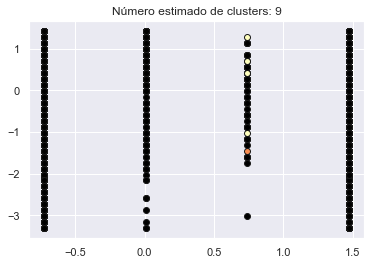

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducción de dimensionalidad a 2D con PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(datosEscalados)

# Graficar los resultados
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro para ruido.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Graficar los puntos de datos que son "núcleo"
    xy = datosEscalados[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % len(unique_labels))
plt.show()


### 6.1 Preparar los datos
A nivel de preparación de datos debemos fijarnos en:
- A. Correcciones relacionadas con problemas de calidad de dato: nulos, duplicados, inconsistencia, diferencia de formatos, etc.
- B. Preparación relacionada con la tarea de aprendizaje
    - Selección de columnas a incluir de acuerdo con la tarea de aprendizaje a realizar y el conocimiento del contexto del negocio
    - ...
- C. Preparación de acuerdo con el algoritmo a utilizar, en este caso K-means
    Al revisar k-means vemos que el algoritmo trabaja únicamente con datos numéricos, y no nulos así que si vamos a incluir datos categóricos debemos transformarlos a numéricos y si tenemos datos nulos debemos transformalos y en el peor escenario retirarlos del modelo ya sea la fila que los incluye o toda la columna si el porcentaje de estos valores es alto.

### 7 Analizar y concluir